In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

signal=100
delta=0.5
flucLow=0.59
flucHigh=0.61


avAlphaVec=[]
avBetaVec=[]
avGammaVec=[]
for j in range(0,100):
    
    minAlpha=0
    minBeta=0
    minGamma=0
    minTimeScore=10000
    alpha=0.5
    beta=0.5
    gamma=0.5
    alphaVec=[alpha]
    betaVec=[beta]
    gammaVec=[gamma]
    oldTimeScore=10000
    for i in range(0,100000):
        p1Conc=0.5
        p2Conc=0.5
        p3Conc=0.5
        
        for k in range(0,10000):
            p1Conc=(1-alpha-beta)*p1Conc+signal
            p2Conc=(1-gamma)*p2Conc+ alpha*p1Conc
            p3ConcOld=p3Conc
            p3Conc=(1-delta)*p3Conc-gamma*p2Conc+beta*p1Conc
            if p3ConcOld == p3Conc and k>0:
                timeScore=k
                
                break
        #if timeScore> oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        #if timeScore< oldTimeScore:
        #    randi = np.random.rand()
        #    if randi <0.2:
        #        alpha=oldAlpha
        #        beta=oldBeta
        #        gamma=oldGamma
        if timeScore< minTimeScore and p3Conc >flucLow and p3Conc < flucHigh:
            #print(timeScore)
            minTimeScore = timeScore
            minAlpha=alpha
            minBeta=beta
            minGamma=gamma
            minp3=p3Conc
        #print(p3Conc)
        oldTimeScore=timeScore
        oldAlpha=alpha
        oldBeta=beta
        oldGamma=gamma   
        if p3Conc <0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta <0.99:
                beta=beta+0.01
            if rando > 0.33 and rando <= 0.66 and alpha>0.01:
                alpha=alpha-0.01
            if rando >0.66 and gamma> 0.01:
                gamma = gamma - 0.01
        if p3Conc >= 0.6:
            rando=np.random.rand()
            if rando >0 and rando <= 0.33 and beta>0.01:
                beta=beta-0.01
            if rando > 0.33 and rando <= 0.66 and alpha<0.99:
                alpha=alpha+0.01
            if rando >0.66 and gamma<0.99:
                gamma = gamma + 0.01
        alphaVec.append(alpha)
        betaVec.append(beta)
        gammaVec.append(gamma)
    #avAlphaVec.append(alphaVec[999])
    #avBetaVec.append(betaVec[999])
    #avGammaVec.append(gammaVec[999])
    #plt.plot(avAlphaVec,'r.')
    #plt.plot(avBetaVec,'b.')
    #plt.plot(avGammaVec,'g.')
    #plt.show()
    print("min",minTimeScore, minAlpha,minBeta,minGamma,minp3)

KeyboardInterrupt: 

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout
from ipywidgets import interact, IntSlider

m = IntSlider(value=2, min=1, max=10)
@interact(m=m)

def compare_barabasi_albert_graph(m):
    fig, ax = plt.subplots()
    G_ba = nx.barabasi_albert_graph(n=20, m=m)
    x=[]
    y=[]
    for i in list(G_ba.nodes):
        x.append(i)
        y.append(G_ba.degree(i))
    ax.scatter(x, y, label="Barabasi-Albert Graph")



vertices=5
edgeProb=0.4
G=nx.erdos_renyi_graph(vertices,edgeProb,directed=True)
G.add_edge(0, 0)
duplicationGenes = [0,1,2]
G_dup=gf.duplicate_genes(G,duplicationGenes)


interactive(children=(IntSlider(value=2, description='m', max=10, min=1), Output()), _dom_classes=('widget-int…

In [2]:
n=5
m=5
qCon=0.5
qMod = 0.6
G=nx.DiGraph(nx.scale_free_graph(2))
G=gf.dmc_single_lineage(G,n,qCon,qMod)
G1,G2=gf.network_birth(G,m,m,qCon,qMod,iteration = n)
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)

#print(len(list(G1.nodes)),len(list(G2.nodes)))
#nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)
#G1_forest=gf.duplication_forest(G1,n+m)
#G2_forest=gf.duplication_forest(G2,n+m)



In [3]:
G=gf.label_conserver(G)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
#print(len(list(G1.nodes)),len(list(G2.nodes)))
#nx.draw_circular(G,with_labels=True)
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)
G_orig=copy.deepcopy(G)

In [5]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G1_forest)
edge_labels = dict([((n1, n2), G1_forest[n1][n2]['weight'])
                    for n1, n2 in G1_forest.edges])

#nx.draw_circular(G1_forest,with_labels=True)
#print(nx.is_forest(G1_forest))
#gf.tree_distance_loop('0_4','0_1',G1_forest)
#gf.closest_neighbour_distance('1_4','1_1_4',G1_forest,G2_forest)
#g=Network(height=800,width=800)
#g.barnes_hut()
#g.from_nx(G1_forest)
#g.show("e.html")
labels={}
for node in G1_forest.nodes():
    if G1_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G1_forest,prog="dot")
nx.draw_networkx_edge_labels(G1_forest, pos, edge_labels=edge_labels,font_size=20)
nx.draw(G1_forest,pos,with_labels=False)
nx.draw_networkx_labels(G1_forest,pos,labels,font_size=14)
plt.savefig("tree1.pdf")
plt.show()
#(0,0,2),(1,1,2)(0_1,0_1,2),(0_2,0,2),(2,2,2) 5-10/4=(20-10)/4=10/5 = 5/2 5/2/5=1/2=0.5

NameError: name 'G1_forest' is not defined

<Figure size 1080x576 with 0 Axes>

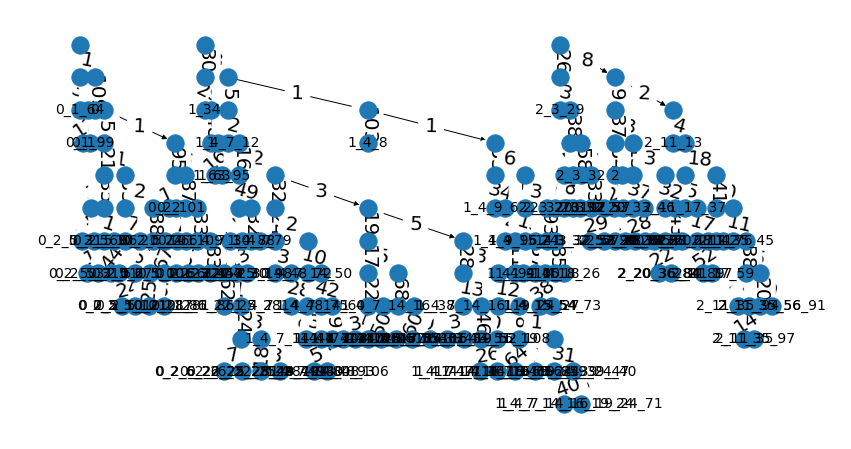

In [6]:
plt.figure(figsize=(15, 8))
pos=nx.circular_layout(G2_forest)
edge_labels = dict([((n1, n2), G2_forest[n1][n2]['weight'])
                    for n1, n2 in G2_forest.edges])

#print(nx.is_forest(G2_forest))
labels={}
for node in G2_forest.nodes():
    if G2_forest.out_degree(node)==0:
        labels[node]=node
pos=graphviz_layout(G2_forest,prog="dot")
nx.draw_networkx_edge_labels(G2_forest, pos, edge_labels=edge_labels,font_size=20)
nx.draw(G2_forest,pos,with_labels=False)
nx.draw_networkx_labels(G2_forest,pos,labels,font_size=14)
plt.savefig("tree2.pdf")
plt.show()

In [2]:
nx.draw_circular(G1,with_labels=True)
plt.savefig("g1original.pdf")

NameError: name 'nx' is not defined

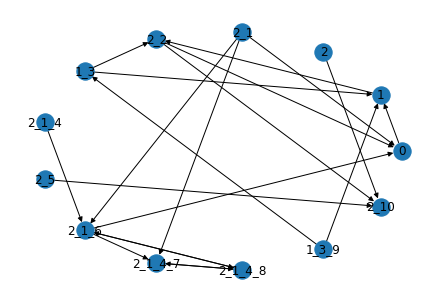

In [ ]:
nx.draw_circular(G2,with_labels=True)
plt.savefig("g2original.pdf")

EC: 0.38461538461538464
ICS: 0.45454545454545453
S3: 0.2631578947368421


NameError: name 'G1_forest' is not defined

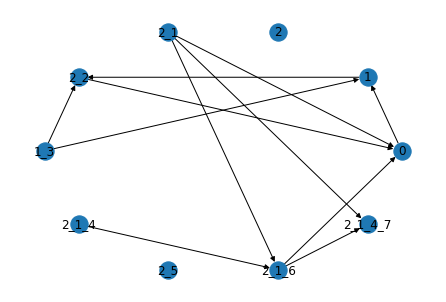

In [21]:
sourceEdges= len(list(G1.edges()))
#print(sourceEdges)
conservedEdge=0

for x in list(G1.nodes):
    for y in list(G2.nodes):
        if (x,y) in list(G1.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
#print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1.nodes))
nx.draw_circular(G2_ind,with_labels=True)
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
originalNCScore=gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m)
print("Original Modified NC SCore ",gf.original_networks_NC_score(G1,G2,G1_forest,G2_forest,n+m,m))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))

In [4]:
G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
P1=gf.gene_family_partitioner(G1,orig_label=True)
P2=gf.gene_family_partitioner(G2,orig_label=True)
print(P1,P2)
alignVec,mapped=gf.NF_gene_family(G1,G2,P1,P2,32,0.8)
mapping1 = dict(alignVec)
mapping2=dict()
print(mapping1)
for i in list(G2.nodes):

    if i not in mapping1.values():
        mapping2[i]=str(i)+"_2"
    else:
        mapping2[i]=i
for i in list(G1.nodes):
    if i not in mapping1.keys():
        mapping1[i]=str(i)+"_1"

print(mapping1)
print(mapping2)
G1_mapped=nx.relabel_nodes(G1,mapping1)

G2_mapped=nx.relabel_nodes(G2,mapping2)
#G2TrueLabel=dict()
#G1TrueLabel=dict()
#for i in list(G1_mapped.nodes):
#    if isinstance(i,int):
    
#        G1TrueLabel[i]=G1.nodes[i]['orig_label']
#for i in list(G2.nodes):
#    G2TrueLabel[i]=G2.nodes[i]['orig_label']
#print("Alignment mapping:",alignVec)
#print(G1TrueLabel)
#print(G2TrueLabel)


P1=gf.gene_family_partitioner(G1_mapped,orig_label=True)
P2=gf.gene_family_partitioner(G2_mapped,orig_label=True)
print(P1,P2)


{'0': [0, 3, 7, 9], '1': [1, 4, 6], '2': [2, 5, 8, 10, 11, 12]} {'0': [0, 3, 7, 10], '1': [1, 4, 6, 8, 9], '2': [2, 5, 11, 12]}
{0: 0, 4: 4, 5: 5, 6: 8, 1: 1, 7: 3, 9: 7, 3: 10, 12: 11, 10: 12}
{0: 0, 4: 4, 5: 5, 6: 8, 1: 1, 7: 3, 9: 7, 3: 10, 12: 11, 10: 12, 2: '2_1', 8: '8_1', 11: '11_1'}
{0: 0, 1: 1, 2: '2_2', 3: 3, 4: 4, 5: 5, 6: '6_2', 7: 7, 8: 8, 9: '9_2', 10: 10, 11: 11, 12: 12}
Alignment mapping: [(0, 0), (4, 4), (5, 5), (6, 8), (1, 1), (7, 3), (9, 7), (3, 10), (12, 11), (10, 12)]
{0: 0, 1: 1, 10: '2_8', 4: '1_2', 5: '2_3', 8: '2_6', 3: '0_1', 7: '0_1_5', 12: '2_10', 11: '2_6_9'}
{0: 0, 1: 1, 2: 2, 3: '0_1', 4: '1_2', 5: '2_3', 6: '1_4', 7: '0_1_5', 8: '1_4_6', 9: '1_4_7', 10: '0_1_5_8', 11: '2_9', 12: '2_10'}
{'0': [0, 10, 3, 7], '1': [1, 4, 8], '2': ['2_1', 5, '8_1', 12, '11_1', 11]} {'0': [0, 3, 7, 10], '1': [1, 4, '6_2', 8, '9_2'], '2': ['2_2', 5, 11, 12]}


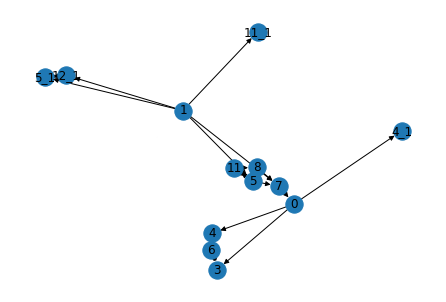

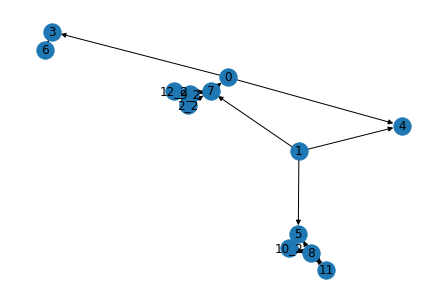

In [19]:
nx.draw(G1_mapped,with_labels=True)
plt.figure()
nx.draw(G2_mapped,with_labels=True)

In [15]:
G=nx.convert_node_labels_to_integers(G_orig)
G1=nx.convert_node_labels_to_integers(G1_orig)
G2=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped,pairingDictParents,pairingDictChildren=gf.NF(G1,G2,32,0.8)
mapping = dict(alignVec)
#print(mapped)
G1_mapped=nx.induced_subgraph(G1,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)
#print(G1_mapped.edges)
#print(G2.edges)


2.161111111111111
1.8453333333333335
1.3120000000000003
2.1333333333333337
3.666666666666667
0.9216000000000002
4.533333333333334
1.3511111111111114
1.7920000000000003
1.7920000000000003
1.706666666666667
0.9216000000000002
4.359999999999999
1.3120000000000003
2.6
1.4080000000000004
1.3866666666666667
1.0730666666666666
2.14
1.4826666666666668
1.6400000000000001
1.3333333333333335
1.7333333333333334
1.4400000000000002
2.64
1.3461333333333334
28.106666666666673
2.4533333333333336
32.75
2.611111111111111
0.7822222222222223
2.2
2.4000000000000004
1.88
1.2444444444444445
2.2666666666666666
1.9666666666666666
1.568888888888889
2.2933333333333334
1.3120000000000003
2.333333333333333
1.3226666666666669
1.6000000000000003
1.2096
1.9733333333333334
1.4400000000000002
1.8533333333333335
1.6
2.0
1.6
1.6400000000000001
1.4144
19.91466666666667
2.4000000000000004
43.166666666666664
1.8263888888888888
68.26666666666667
2.2
1.8666666666666667
18.400000000000002
33.333333333333336
2.9333333333333336
4

ValueError: not enough values to unpack (expected 4, got 2)

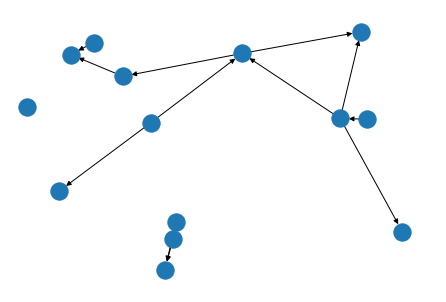

In [32]:
pos=nx.circular_layout(G2)
nx.draw(G1)
plt.savefig("Graph1unalignedmanytoone.pdf")

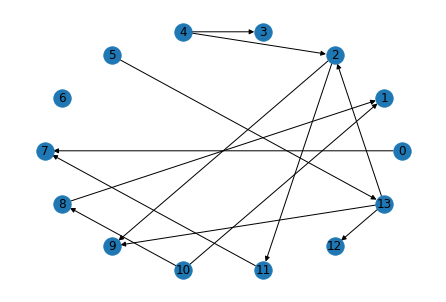

In [33]:
pos=nx.circular_layout(G2)
nx.draw(G1_mapped,with_labels=True,pos=pos)
plt.savefig("Graph1alignedmanytoone.pdf")


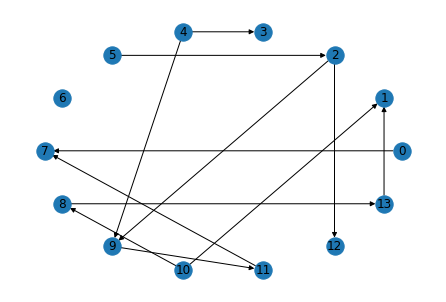

In [34]:

nx.draw(G2,with_labels=True,pos=pos)
plt.savefig("Graph2alignedmanytoone.pdf")


13
6
EC: 0.46153846153846156
ICS: 0.5
S3: 0.3157894736842105
11 1
Modified NC Score of Alignment 0.8571428571428571
Original Modified NC Score 1.0
Quality of Alignment Based off NC Score 0.8571428571428571


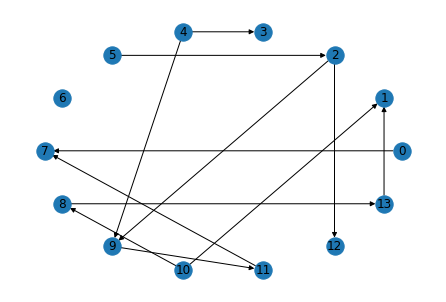

In [35]:
sourceEdges= len(list(G1_mapped.edges()))
print(sourceEdges)
conservedEdge=0
for x in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
    for y in range(0,max(len(list(G1_mapped.nodes)),len(list(G2.nodes)))):
        if (x,y) in list(G1_mapped.edges) and (x,y) in list(G2.edges):
            conservedEdge=conservedEdge+1
print(conservedEdge)
print("EC:",conservedEdge/sourceEdges)

G2_ind = nx.induced_subgraph(G2,list(G1_mapped.nodes))
inducedEdges=len(list(G2_ind.edges))
print("ICS:",conservedEdge/inducedEdges)
print("S3:",conservedEdge/(sourceEdges+inducedEdges-conservedEdge))
#print("New MEtric",2*conservedEdge/(sourceEdges+inducedEdges))
nx.draw(G2_ind,with_labels=True,pos=pos)
print(n+m,m)
modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
print("Modified NC Score of Alignment",gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m))
print("Original Modified NC Score",originalNCScore)
print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)

[13, 1, 7, 10, 8, 2, 4, 11, 0, 3, 5, 12, 9]


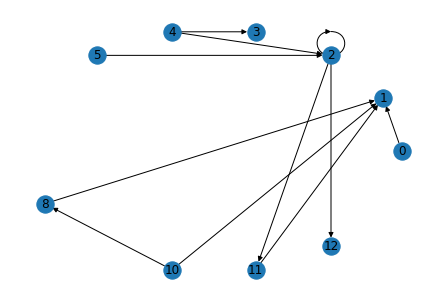

In [36]:

alignVec,mapped=gf.NF_many_to_one(G1,G,32,0.8)
print(mapped)
G1=nx.induced_subgraph(G1,list(mapped))
mapping = dict(alignVec)
G1=nx.relabel_nodes(G1,mapping)
nx.draw(G1,with_labels=True,pos=pos)

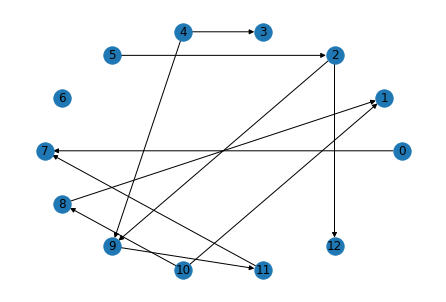

In [37]:
nx.draw(G,with_labels=True,pos=pos)

In [38]:
def node_match(a,b):
    print(a,b)
    if a==b:
        return True
    else:
        return False
gf.graph_edit_distance(G1,G2,node_match)

AttributeError: module 'gene_functions' has no attribute 'graph_edit_distance'

In [22]:
maxQuality=0
for a in range(-50,50):
    for b in np.arange(-20,20,0.2):
        G=nx.convert_node_labels_to_integers(G_orig)
        G1=nx.convert_node_labels_to_integers(G1_orig)
        G2=nx.convert_node_labels_to_integers(G2_orig)
        alignVec,mapped=gf.NF_many_to_one(G1,G2,a,b)
        mapping = dict(alignVec)

        G1_mapped=nx.induced_subgraph(G1,list(mapped))
        G1_mapped=nx.relabel_nodes(G1_mapped,mapping)
        modifiedNCScore=gf.NC_scorer(alignVec,mapped,G1,G2,G1_forest,G2_forest,DMCSteps=n+m,childDistance=m)
        quality=1-(originalNCScore-modifiedNCScore)/originalNCScore
        #print("Modified NC Score of Alignment",modifiedNCScore)
        #print("Original Modified NC Score",originalNCScore)
        #print("Quality of Alignment Based off NC Score",1-(originalNCScore-modifiedNCScore)/originalNCScore)
        #print("Alignment mapping:",alignVec)
        print(a,b,quality)
        if quality >maxQuality:
            maxQuality=quality
            maxA=a
            maxB=b
print(maxA,maxB,maxQuality)


-50 -20.0 0.19999999999999996
-50 -19.8 0.19999999999999996
-50 -19.6 0.19999999999999996
-50 -19.400000000000002 0.19999999999999996
-50 -19.200000000000003 0.19999999999999996
-50 -19.000000000000004 0.19999999999999996
-50 -18.800000000000004 0.19999999999999996
-50 -18.600000000000005 0.19999999999999996
-50 -18.400000000000006 0.19999999999999996
-50 -18.200000000000006 0.19999999999999996
-50 -18.000000000000007 0.19999999999999996
-50 -17.800000000000008 0.19999999999999996
-50 -17.60000000000001 0.19999999999999996
-50 -17.40000000000001 0.19999999999999996
-50 -17.20000000000001 0.19999999999999996
-50 -17.00000000000001 0.19999999999999996
-50 -16.80000000000001 0.19999999999999996
-50 -16.600000000000012 0.19999999999999996
-50 -16.400000000000013 0.19999999999999996
-50 -16.200000000000014 0.19999999999999996
-50 -16.000000000000014 0.19999999999999996
-50 -15.800000000000015 0.19999999999999996
-50 -15.600000000000016 0.19999999999999996
-50 -15.400000000000016 0.199999999

In [144]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

n=100
m=5
qCon=0.5
qMod=0.2
G=nx.path_graph(3)
G=nx.DiGraph(G)
G.remove_edge(0,1)
G.remove_edge(2,1)
iterations=100
network_order_dmc=[]
network_order_nf=[]
S3_nf_vec=[]
S3_nf_vec_ave=[]

S3_dmc_vec=[]
S3_dmc_vec_ave=[]

network_order_dmc_vec_ave=[]
network_order_nf_vec_ave=[]
EC_nf_vec_ave=[]
ICS_nf_vec_ave=[]
    
EC_dmc_vec_ave=[]
ICS_dmc_vec_ave=[]

qMod_vec=[i for i in np.arange(0,1.001,0.01)]
G_anc=gf.dmc_single_lineage(G,n,qCon,qMod,iteration=0)
G_anc=gf.label_conserver(G_anc)
G1,G2=gf.network_birth(G_anc,m,m,qCon,qMod,iteration=n)
G1=gf.label_conserver(G1)
G2=gf.label_conserver(G2)
        

In [10]:

G_dmc_anc=gf.dmc_anc_rec(G1,G2,qMod,qCon)
for j in list(G_dmc_anc.nodes()):
    if (G_dmc_anc.out_degree(j)==0 and G_dmc_anc.in_degree(j)==0):
        G_dmc_anc.remove_node(j)
    elif G_dmc_anc.out_degree(j)==1 and G_dmc_anc.in_degree(j)==1 and (j,j) in list(G_dmc_anc.edges):
        G_dmc_anc.remove_node(j)
sourceEdges= len(list(G_dmc_anc.edges()))
targetEdges=len(list(G_anc.edges()))
conservedEdge=0
extraEdge=0
for x in list(G_anc.nodes):
    for y in list(G_anc.nodes):
        if (x,y) in list(G_dmc_anc.edges) and (x,y) in list(G_anc.edges):
            conservedEdge=conservedEdge+1
        elif (x,y) in list(G_dmc_anc.edges):
            extraEdge=extraEdge+1
if sourceEdges==0:
    EC_dmc=0
else:
    EC_dmc=0.5*(conservedEdge/sourceEdges+conservedEdge/targetEdges)

G2_ind = nx.induced_subgraph(G_anc,list(G_dmc_anc.nodes))
        
        
print(extraEdge,conservedEdge)
#overFlowEdges_dmc=(extraEdge-conservedEdge)/extraEdge
inducedEdges=len(list(G2_ind.edges))
        
if inducedEdges==0:
    ICS_dmc=0
else:
    ICS_dmc=conservedEdge/inducedEdges
if sourceEdges+inducedEdges-conservedEdge==0:
    S3_dmc=0
else:
    S3_dmc=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
        
        

0 1132


In [11]:
G1_orig=copy.deepcopy(G1)
G2_orig=copy.deepcopy(G2)

G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
alignVec,mapped=gf.NF_alt(G1_labelless,G2_labelless,32,0.8)
mapping = dict(alignVec)

G1_mapped=nx.induced_subgraph(G1_labelless,list(mapped))
G1_mapped=nx.relabel_nodes(G1_mapped,mapping)

print("Alignment mapping:",alignVec)

G_intersect=nx.intersection(G1_mapped,G2_labelless)

for j in list(G_intersect.nodes()):
    if (G_intersect.out_degree(j)==0 and G_intersect.in_degree(j)==0):
        G_intersect.remove_node(j)
    elif G_intersect.out_degree(j)==1 and G_intersect.in_degree(j)==1 and (j,j) in list(G_intersect.edges):
        G_intersect.remove_node(j)

mapping=dict()
for i in list(G_intersect.nodes):
    mapping[i]=G_intersect.nodes[i]['orig_label']
G_nf_anc=nx.relabel_nodes(G_intersect,mapping)
        
        

sourceEdges= len(list(G_nf_anc.edges()))
targetEdges=len(list(G_anc.edges()))
conservedEdge=0
extraEdge=0
for x in list(G_anc.nodes):
    for y in list(G_anc.nodes):
        if (x,y) in list(G_nf_anc.edges) and (x,y) in list(G_anc.edges):
            conservedEdge=conservedEdge+1
        elif (x,y) in list(G_nf_anc.edges):
            extraEdge=extraEdge+1
if sourceEdges==0:
    EC_nf=0
else:
    EC_nf=0.5*(conservedEdge/sourceEdges+conservedEdge/targetEdges)
        
G2_ind = nx.induced_subgraph(G_anc,list(G_nf_anc.nodes))
        
        
#overFlowEdges_nf=(extraEdge-conservedEdge)/extraEdge
inducedEdges=len(list(G2_ind.edges))
print(extraEdge,conservedEdge)
        
if inducedEdges==0:
    ICS_nf=0
else:
    ICS_nf=conservedEdge/inducedEdges
if sourceEdges+inducedEdges-conservedEdge==0:
    S3_nf=0
else:
    S3_nf=conservedEdge/(sourceEdges+inducedEdges-conservedEdge)
    





Alignment mapping: [(62, 62), (15, 15), (97, 97), (17, 17), (48, 48), (102, 102), (33, 33), (49, 49), (40, 40), (75, 75), (90, 90), (54, 54), (66, 66), (28, 28), (65, 65), (85, 85), (101, 101), (77, 77), (58, 58), (22, 22), (82, 82), (20, 20), (36, 36), (81, 81), (32, 32), (34, 34), (5, 5), (11, 11), (72, 72), (78, 78), (37, 37), (10, 10), (106, 60), (44, 44), (100, 43), (26, 26), (68, 68), (6, 92), (45, 14), (18, 18), (43, 12), (63, 63), (1, 1), (47, 107), (12, 100), (31, 31), (93, 93), (70, 70), (73, 73), (87, 87), (51, 51), (7, 7), (89, 89), (88, 88), (46, 46), (57, 57), (30, 30), (79, 79), (13, 13), (86, 69), (55, 55), (21, 21), (4, 39), (60, 56), (91, 19), (27, 27), (50, 50), (84, 84), (71, 71), (95, 95), (96, 45), (74, 74), (3, 3), (2, 41), (59, 59), (39, 80), (99, 23), (42, 42), (41, 35), (98, 98), (19, 64), (29, 29), (80, 76), (53, 8), (23, 91), (69, 96), (94, 4), (16, 16), (103, 94), (14, 106), (105, 104), (38, 47), (8, 61), (92, 6), (67, 2), (24, 24), (76, 53), (64, 99), (52,

In [39]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

n=20
m=5
qCon=0.5
qMod = 0.5
G=nx.DiGraph(nx.scale_free_graph(3))

G_anc=gf.dmc_single_lineage(G,n,qCon,qMod,iteration=0)
G1,G2=gf.network_birth(G_anc,m,m,qCon,qMod,iteration=n)



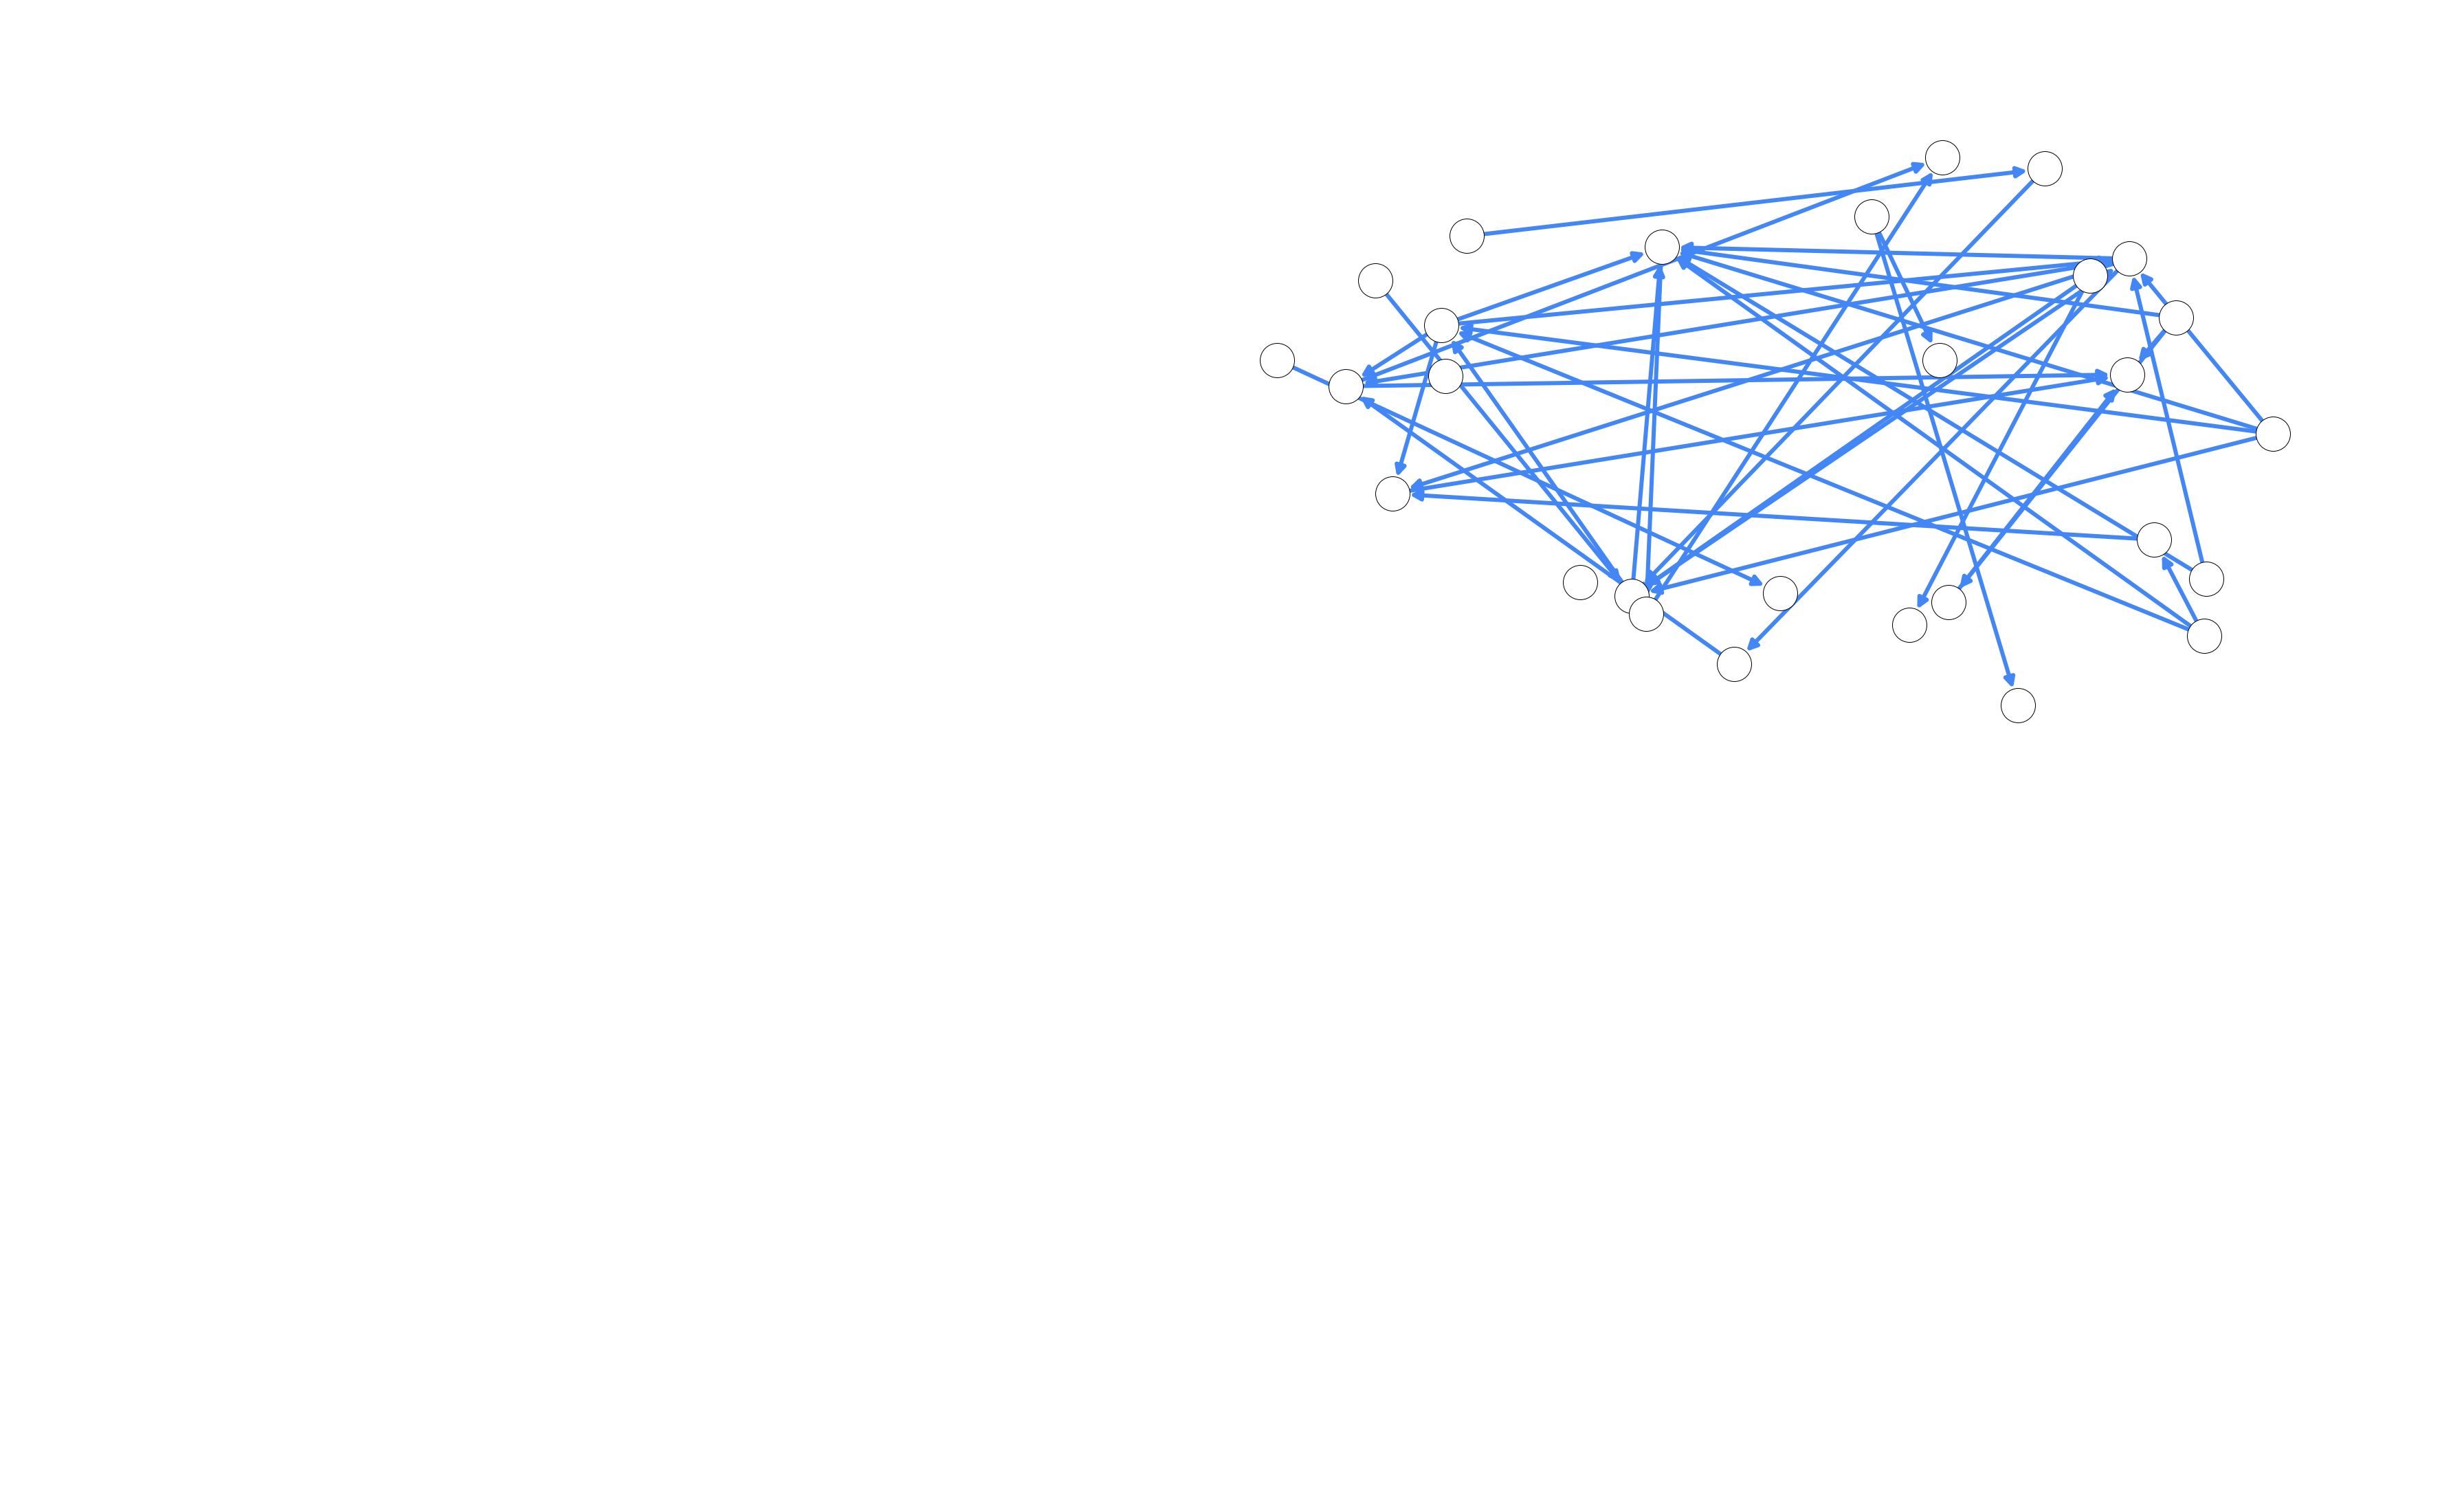

In [81]:
#G=nx.DiGraph(nx.scale_free_graph(3))
G=G1
G_dup=G
#print(G_dup.edges)
pos=nx.random_layout(G_dup)
for e in G.edges:
    
    G[e[0]][e[1]]['color']='#4287f5'
    
for e in G_dup.edges:
    if e[0]=='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    else:
        G_dup[e[0]][e[1]]['color']='#4287f5'
plt.figure(figsize=(64,40))
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.2)  
  
#nx.draw(G,pos,with_labels=True,node_color='#FFFFFF',edge_color=edge_color_list,node_size=700,width=1.5,font_size=13)
nx.draw_networkx_edges(G, pos=pos,width=6,edge_color=edge_color_list,node_size=2500,arrowsize=30)
nx.draw_networkx_nodes(G,pos,node_color='#FFFFFF',node_size=2500,edgecolors="#000000",linewidths=1)
#nx.draw_networkx_labels(G,pos,font_size=30)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
edge_color_list = [G_dup[e[0]][e[1]]['color'] for e in G_dup.edges() ]
plt.axis('off')
plt.savefig("j.png",transparent=True)

In [ ]:
print(G_dup.edges)
pos=nx.spring_layout(G_dup)
for e in G.edges:
    
    G[e[0]][e[1]]['color']='#4287f5'
    
for e in G_dup.edges:
    if e[0]=='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    else:
        G_dup[e[0]][e[1]]['color']='#4287f5'
plt.figure(figsize=(16,10))
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1)  
  
#nx.draw(G,pos,with_labels=True,node_color='#FFFFFF',edge_color=edge_color_list,node_size=700,width=1.5,font_size=13)
nx.draw_networkx_edges(G, pos=pos,width=6,edge_color=edge_color_list,node_size=4000)
nx.draw_networkx_nodes(G,pos,node_color='#FFFFFF',node_size=4000,edgecolors="#000000")
nx.draw_networkx_labels(G,pos,font_size=30)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
edge_color_list = [G_dup[e[0]][e[1]]['color'] for e in G_dup.edges() ]
plt.axis('off')
plt.savefig("1.png",transparent=True)

In [3]:
#G_dup=gf.duplicate_genes(G,[1],1)
#G_dup=nx.relabel_nodes(G_dup,{'1_1':'1\''})



[(0, 1), (0, 2), (0, 3), (0, 0), (0, "1'"), (1, 2), (2, 0), (4, 1), (4, "1'"), ("1'", 2)]


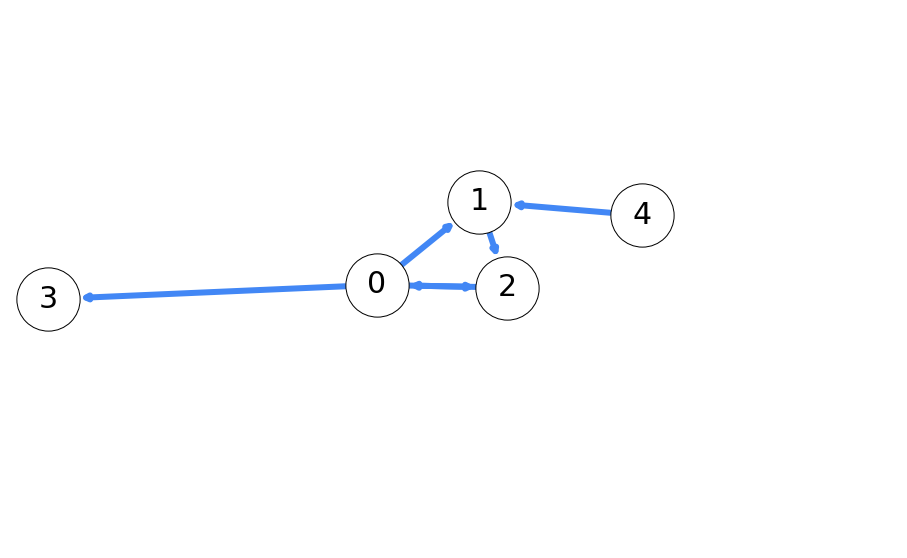

In [4]:
pos=nx.spring_layout(G_dup)
for e in G.edges:
    
    G[e[0]][e[1]]['color']='#4287f5'
    
for e in G_dup.edges:
    if e[0]=='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dup[e[0]][e[1]]['color']='#f54842'
    else:
        G_dup[e[0]][e[1]]['color']='#4287f5'
plt.figure(figsize=(16,10))
edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges() ]
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1)  
  
#nx.draw(G,pos,with_labels=True,node_color='#FFFFFF',edge_color=edge_color_list,node_size=700,width=1.5,font_size=13)
nx.draw_networkx_edges(G, pos=pos,width=6,edge_color=edge_color_list,node_size=4000)
nx.draw_networkx_nodes(G,pos,node_color='#FFFFFF',node_size=4000,edgecolors="#000000")
nx.draw_networkx_labels(G,pos,font_size=30)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 
edge_color_list = [G_dup[e[0]][e[1]]['color'] for e in G_dup.edges() ]
plt.axis('off')
plt.savefig("1.png",transparent=True)

['#4287f5', '#4287f5', '#4287f5', '#f54842', '#4287f5', '#4287f5', '#4287f5']


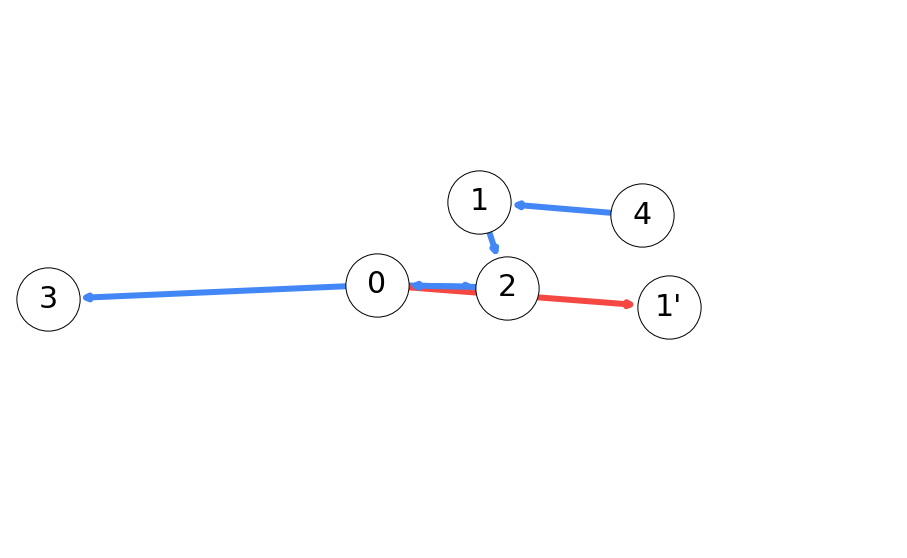

In [7]:
plt.figure(figsize=(16,10))

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1)  
  
G_dupdel=copy.deepcopy(G_dup)
G_dupdel.remove_edges_from([(0,1),(4,'1\''),('1\'',2)])
for e in G_dupdel.edges:
    if e[0]=='1\'':
        G_dupdel[e[0]][e[1]]['color']='#f54842'
    elif e[1] =='1\'':
        G_dupdel[e[0]][e[1]]['color']='#f54842'
    else:
        G_dupdel[e[0]][e[1]]['color']='#4287f5'
edge_color_list = [G_dupdel[e[0]][e[1]]['color'] for e in G_dupdel.edges() ]
collection = nx.draw_networkx_edges(G_dupdel, pos=pos,width=6,edge_color=edge_color_list,node_size=4000)
#for i,patch in enumerate(collection):
#    if i==7 or i==0 or i==8:
#        patch.set_linestyle(':')
#        patch.set_linewidth(6)

nx.draw_networkx_nodes(G_dup,pos,node_color='#FFFFFF',node_size=4000,edgecolors="#000000")
nx.draw_networkx_labels(G_dup,pos,font_size=30)
print(edge_color_list)
#ax = plt.gca() # to get the current axis
#ax.collections[0].set_edgecolor("#000000") 
plt.axis('off')
plt.savefig("4.png",transparent=True)

In [84]:
nt = Network('500px', '500px',directed=True)
nt.show_buttons()
nt.from_nx(G)
nt.show('nx.html')

In [162]:
nt = Network('500px', '500px',directed=True)

nt.from_nx(G_dup)
nt.show_buttons()
nt.show('nx.html')


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

import json as js
f = open('sorghum.json',)
data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)

G_sorg=gf.cytoscape_graph(data,name="l")
print(G_sorg.nodes['8387']['l'])
print(G_sorg.edges)
print(G_sorg.nodes)
G=nx.Graph()
for e in G_sorg.edges():
    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


nt = Network('1000px', '1000px',directed=False)

nt.from_nx(G)
nt.show_buttons()
nt.show('nx.html')



FileNotFoundError: [Errno 2] No such file or directory: 'sorghum.json'

In [33]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

import json as js
#f = open('sorghum.json',)
#data=js.load(f)
#data={"nodes": [{"data": {"id": "a", "label": "Gene1"}},{"data": {"id": "b", "label": "Gene2"}},{"data": {"id": "c", "label": "Gene3"}},{"data": {"id": "d", "label": "Gene4"}},{"data": {"id": "e", "label": "Gene5"}},{"data": {"id": "f", "label": "Gene6"}}],"edges": [{"data": {"id": "ab","source": "a","target": "b"}},{"data": {"id": "cd","source": "c","target": "d"}},{"data": {"id": "ef","source": "e","target": "f"}},{"data": {"id": "ac","source": "a","target": "d"}},{"data": {"id": "be","source": "b","target": "e"}}]        }
#print(data)
print("AAAAAAAAAAAAAAA")
out_deg_dist=dict()
in_deg_dist=dict()
G_col=nx.read_edgelist("E_coli_GRN\E_coli_GRN_edges_only.txt",create_using=nx.DiGraph())
G_col=max(ut.connected_component_subgraphs(G_col),key=len)
G_col=nx.convert_node_labels_to_integers(G_col)
G_coli=nx.DiGraph()
for i in G_col.nodes:
    G_coli.add_node(i)
for i in G_col.edges:
    G_coli.add_edge(i[0],i[1])
for i in G_coli.nodes:
    in_deg_dist[i]=0
    out_deg_dist[i]=0
    for j in G_coli.predecessors(i):
        in_deg_dist[i]=in_deg_dist[i]+1
    for j in G_coli.successors(i):
        out_deg_dist[i]=out_deg_dist[i]+1

inList=list(in_deg_dist.values())
outList=list(out_deg_dist.values())
inList=sorted(inList)
outList=sorted(outList)
#ut.loglog_degree_sequence_plot(G_coli)
'''
bins = np.arange(0, 200, 1) # fixed bin size

#plt.xlim([0, 200])



hist, bins = np.histogram(outList, bins=bins)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(outList, bins=bins, alpha=0.5,log=True)
plt.xscale('log')
plt.title('')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()
'''
G=dup.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
node_remover=[]
#for q in [0.5]:

#    G_q=dup.dmc_single_lineage(G,steps,0,q,iteration=0)
    
    #for i in G_q.nodes():
    #    if len(list(G_q.predecessors(i)))==0 and len(list(G_q.successors(i)))==0:
    #        node_remover.append(i)
#if len(node_remover)!=0:
#    G_q.remove_nodes_from(node_remover)
#ut.pair_loglog_degree_sequence_plot(G_q,G)
    
#G=nx.Graph()
#for e in G_sorg.edges():
#    G.add_edge(G_sorg.nodes[e[0]]['l'],G_sorg.nodes[e[1]]['l'])


nt = Network('1000px', '1000px',directed=True)

nt.from_nx(G_coli)
nt.show_buttons()
nt.show('nx.html')



AAAAAAAAAAAAAAA
1793


In [1]:
ut.pair_loglog_degree_sequence_plot(G_q,G)

NameError: name 'ut' is not defined

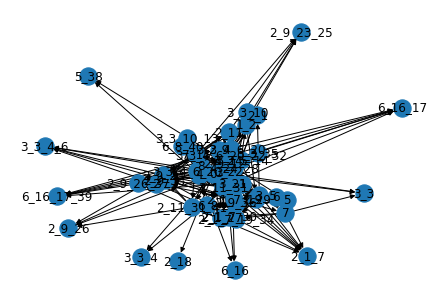

In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import gene_functions as gf
import scipy as sp
import copy
from pyvis.network import Network
from IPython.display import HTML,display
import pydot
import graphviz
from networkx.drawing.nx_pydot import graphviz_layout

G=gf.GRN_seed_graph_ped_pea(steps=41,r=0.8,q=0.8)
nx.draw(G,with_labels=True)
nt = Network('1000px', '1000px',directed=True)

nt.from_nx(G)
nt.show_buttons()
nt.show('nx.html')

In [16]:
ancestor=G

In [3]:
import numpy as np
import networkx as nx
from Genetc import gene_functions as gf
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import copy as copy
r=0.2
q=0.4
steps=41
ancestor=gf.GRN_seed_graph_ped_pea(steps,r,q)
r=3
print(len(ancestor.nodes))
direc="test_datasets_ancestral/regulatory_test_ped_pea/"
for branchLength in [1,2,5,10,20,50,100,200,500]:
    t=nx.DiGraph()
    t.add_edge(0,1)
    t.add_edge(1,2)
    t.add_edge(1,3)
    t.add_edge(0,4)
    t.add_edge(4,5)
    t.add_edge(4,6)


    t[0][1]["weight"]=branchLength
    t[1][2]["weight"]=branchLength
    t[1][3]["weight"]=branchLength
    t[0][4]["weight"]=branchLength
    t[4][5]["weight"]=branchLength
    t[4][6]["weight"]=branchLength

    #ancestor=nx.complete_graph(5)
    #ancestor=nx.DiGraph(ancestor)
    #ancestor=gf.dmc_single_lineage(ancestor,50,0.1,0.4,iteration=0)
    graphLeaves,internalGraphs=gf.ped_pea_graphs_from_tree(ancestor,t,r,q)
    '''
    for i in graphLeaves:
        for j in graphLeaves:
            if i in [2,3,5,6] and j in [2,3,5,6]:
                if j>i:
                    G1=copy.deepcopy(graphLeaves[i])
                    G2=copy.deepcopy(graphLeaves[j])
                    inter=nx.intersection(G1,G2)
                    for k in list(inter.nodes):
                        if str(k)[]:
    '''

    for i in graphLeaves:
        if i in [2,3,5,6]:
            G=graphLeaves[i]
            print(len(G.nodes()))
            nx.write_edgelist(G,"test_datasets_ancestral/regulatory_test_ped_pea/anc50_2cherry_branch"+str(branchLength)+"/LEAF"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt")
    for i in internalGraphs:
        if i in [0,1,4]:
            nx.write_edgelist(internalGraphs[i],"test_datasets_ancestral/regulatory_test_ped_pea/anc50_2cherry_branch"+str(branchLength)+"/INTERNAL"+str(i)+"_two_cherry_branchLength"+str(branchLength)+".txt")


50
itrec 0
itrec 1
itrec 2
itrec 3
itrec 4
itrec 5
52
52
52
52
itrec 0
itrec 2
itrec 4
itrec 6
itrec 8
itrec 10
54
54
54
54
itrec 0
itrec 5
itrec 10
itrec 15
itrec 20
itrec 25
59
59
60
60
itrec 0
itrec 10
itrec 20
itrec 30
itrec 40
itrec 50
70
70
70
70
itrec 0
itrec 20
itrec 40
itrec 60
itrec 80
itrec 100
90
90
90
90
itrec 0
itrec 50
itrec 100
itrec 150
itrec 200
itrec 250
149
149
150
150
itrec 0
itrec 100


KeyboardInterrupt: 

In [33]:
import numpy as np
import networkx as nx
from Genetc import gene_functions as gf
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import copy as copy
from Genetc import utilities as gf
from Genetc import ancestral as gf
from Genetc import alignment as gf
from Genetc import duplication as gf
r=0.5
q=0.4
steps=41
ancestor=gf.GRN_seed_graph_ped_pea(steps,r,q)

branchLength=50
print(len(ancestor.nodes))
direc="test_datasets_ancestral/varying_r_ancestral/"
for r in [0,0.1,0.2,0.5,1,2,5]:
  
    G1,G2=gf.ped_pea_network_birth(ancestor,branchLength,branchLength,r,q=0.4,iteration=0)
    nx.write_edgelist(G,direc+str(r)+".txt")
  

50


In [42]:

import numpy as np
import networkx as nx
from Genetc import gene_functions as gf
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import copy as copy
from Genetc import utilities as gf
from Genetc import ancestral as gf
from Genetc import alignment as gf
from Genetc import duplication as gf
r=0.5
q=0.4
steps=41
ancestor=gf.GRN_seed_graph_ped_pea(steps,r,q)

branchLength=50
print(len(ancestor.nodes))
direc="test_datasets_ancestral/varying_r_ancestral/"
for r in [0,0.1,0.2,0.5,1,2,5]:
  
    G1,G2=gf.ped_pea_network_birth(ancestor,branchLength,branchLength,r,q=0.4,iteration=0)
    nx.write_edgelist(ancestor,direc+str(r)+"_anc"+".txt")
    nx.write_edgelist(G1,direc+str(r)+"_1"+".txt")
    nx.write_edgelist(G2,direc+str(r)+"_2"+".txt")
for q in [0,0.2,0.4,0.6,0.8,1]:
  
    G1,G2=gf.ped_pea_network_birth(ancestor,branchLength,branchLength,r=0.5,q=q,iteration=0)
    nx.write_edgelist(ancestor,direc+str(r)+"_anc"+".txt")
    nx.write_edgelist(G1,direc+str(r)+"_1"+".txt")
    nx.write_edgelist(G2,direc+str(r)+"_2"+".txt")
  

50


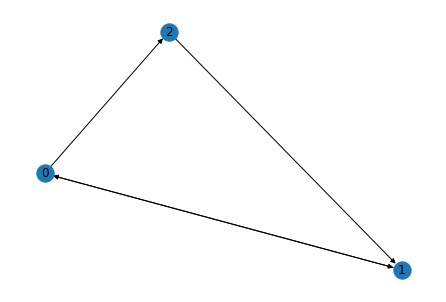

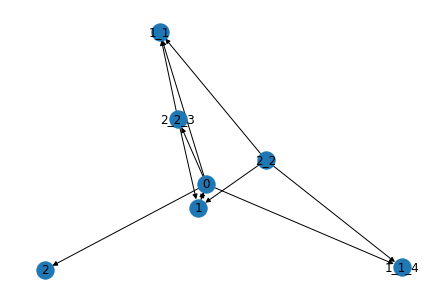

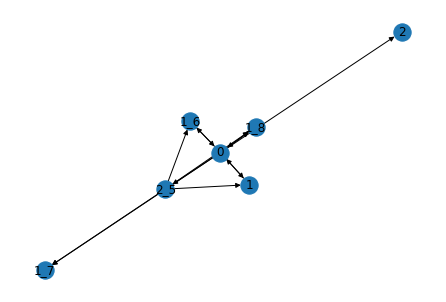

In [1]:
import numpy as np
import networkx as nx
from Genetc import gene_functions as gf
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import copy as copy

nVec=[10,20,30,50,100,200]
iterations=[1]
theVecOfLen=[]
G=gf.GRN_seed_graph_ped_pea(steps=21,r=3,q=0.4)
print("aim",len(G.nodes))
for n in nVec:    
    

    G1=gf.ped_pea_single_lineage(G,n,3,0.4,0)
    G2=gf.ped_pea_single_lineage(G,n,3,0.4,n)
    for tim in iterations:
        print(n,tim)
        
        #nx.draw(G,with_labels=True)
        #plt.figure()
        #nx.draw(G1,with_labels=True)
        #plt.figure()
        #nx.draw(G2,with_labels=True)
        G1_orig=copy.deepcopy(G1)
        G2_orig=copy.deepcopy(G2)   
        P1=gf.gene_family_partitioner(G1_orig)
        P2=gf.gene_family_partitioner(G2_orig)
        #print("Original gene families",P1,P2)
        
        G1_orig=gf.label_conserver(G1_orig)
        G2_orig=gf.label_conserver(G2_orig)
        G1_labelless=nx.convert_node_labels_to_integers(G1_orig)
        G2_labelless=nx.convert_node_labels_to_integers(G2_orig)
        P1=gf.gene_family_partitioner(G1_labelless,orig_label=True)
        P2=gf.gene_family_partitioner(G2_labelless,orig_label=True)
        #print("post relabelling gene families",P1,P2)
        alignVec,mapped=gf.NF_gene_family_2(G1_labelless,G2_labelless,P1,P2,32,0.8,thresh=(10*(n+30)))
        mapping1 = dict(alignVec)
        mapping2=dict()
        #print("Alignment vector",mapping1)
        for i in list(G2_labelless.nodes):

            if i not in mapping1.values():
                mapping2[i]=str(i)+"_2"
            else:
                mapping2[i]=i
        for i in list(G1_labelless.nodes):
            if i not in mapping1.keys():
                mapping1[i]=str(i)+"_1"
        #print("G1 Alignment vector with unmapped nodes", mapping1)
        #print("G2 Alignment vector with unmapped nodes",mapping2)
        G1_mapped=nx.relabel_nodes(G1_labelless,mapping1)
        G2_mapped=nx.relabel_nodes(G2_labelless,mapping2)

        P1=gf.gene_family_partitioner(G1_mapped,orig_label=True)
        P2=gf.gene_family_partitioner(G2_mapped,orig_label=True)
        #print("Gene families after it all",P1,P2)
        G_int=nx.intersection(G1_mapped,G2_mapped)
        mapping=dict()
        for i in list(G_int.nodes):
            mapping[i]=G1_mapped.nodes[i]['orig_label']
        #print("this is the map",mapping)
        G_int=nx.relabel_nodes(G_int,mapping)
        print(len(G_int.nodes))
        theVecOfLen.append(len(G.nodes))
        #nx.draw(G_int,with_labels=True)
        '''
        G_orig=copy.deepcopy(G)
        G_int_orig=copy.deepcopy(G_int)
        G_orig=gf.label_conserver(G)
        G_int_orig=gf.label_conserver(G_int)
        G_labelless=nx.convert_node_labels_to_integers(G_orig)
        G_int_labelless=nx.convert_node_labels_to_integers(G_int_orig)
        P2=gf.gene_family_partitioner(G_labelless,orig_label=True)
        P1=gf.gene_family_partitioner(G_int_labelless,orig_label=True)
        alignVec,mapped=gf.NF_gene_family(G_int_labelless,G_labelless,P1,P2,32,0.8,thresh=tim)
        mapping1 = dict(alignVec)
        mapping2=dict()
        #print("Alignment vector",mapping1)
        G_int_mapped=nx.relabel_nodes(G_int_labelless,mapping1)
        #plt.figure()
        #nx.draw(G_int_mapped,with_labels=True)
        #plt.figure()
        #nx.draw(G,with_labels=True)
        '''

aim 30
10 1
2.823470572260657e-16
3.5374075108263643e-22
1.3351300289494754e-14
4.85340730526499e-43
1.0036381802990133e-17
2.1125403409502986e-52
7.689046544012959e-63
4.1933284973441124e-23
6.46643091392319e-31
3.073527350662875e-14
6.4304699006893756e-12
5.353242128950513e-10
2.440171931924248e-10
7.139628606182931e-12
6.960282144402478e-10
5.422182961828974e-15
6.483264368460364e-08
1.741770588419646e-16
1.0340947878814159e-08
3.434505162323958e-08
4.544851179854582e-07
2.6087406534035533e-06
3.6240761959200827e-06
5.085503669100114e-06
4.146414971766915e-06
0.00010199904042186367
25
20 1
3.156294512684419e-10
6.45063845270511e-11
3.2414568181137267e-10
2.3282390080930192e-38
9.67632325425312e-14
3.3754346416327644e-20
1.7276668840584615e-19
2.0256117210696675e-17
6.636408002170952e-13
5.051378117173511e-13
6.70887765749661e-17
8.04368207871615e-10
5.324791959900737e-09
5.881622641556594e-17
1.1847036169495821e-09
5.7922493052116054e-08
5.464010412326969e-07
1.223268608774202e-06
5

In [1]:
import netcomp as nc
import networkx as nx
from Genetc import gene_functions as gf
import copy
from scipy import sparse
G=nx.erdos_renyi_graph(5,0.5,directed=True)
G1=copy.deepcopy(G)
G2=copy.deepcopy(G)
G1=gf.ped_pea_single_lineage(G1,1,0.5,0.6,i)
G1=gf.ped_pea_single_lineage(G1,1,0.5,0.6,i)
for i in range(300):
    G1=gf.ped_pea_single_lineage(G1,1,0.5,0.6,i)
    G2=gf.ped_pea_single_lineage(G2,1,0.5,0.6,i)
    
    A1=nx.to_numpy_matrix(G1)
    A2=nx.to_numpy_matrix(G2)
    A1 = sparse.csr_matrix(A1)
    A2=sparse.csr_matrix(A2)
    print(nc.lambda_dist(A1,A2,kind="laplacian_norm"))
    



KeyboardInterrupt: 

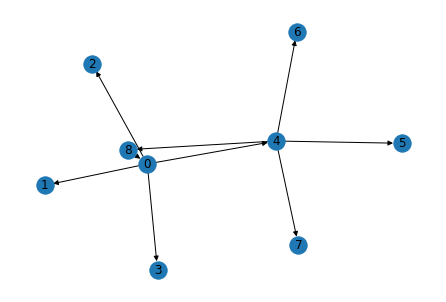

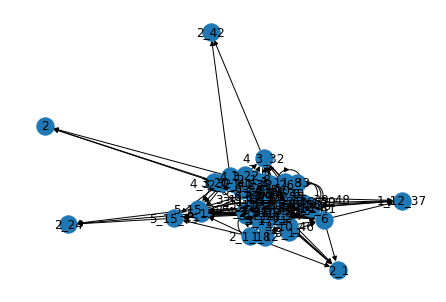

In [32]:
from time import time
from matplotlib.pyplot import xcorr
import networkx as nx
import itertools
import copy
from networkx.readwrite.json_graph import tree
import numpy as np
from networkx.algorithms.shortest_paths.unweighted import all_pairs_shortest_path, predecessor
import math
from collections import defaultdict
from networkx.utils import py_random_state
import random as random
import json
import matplotlib.pyplot as plt
from scipy.stats import expon as ex 
from Genetc import utilities as gf
from Genetc import ancestral as gf
from Genetc import alignment as gf
from Genetc import duplication as gf
G_o=gf.GRN_seed_graph_ped_pea(0,3,0.4)
#G_o=nx.erdos_renyi_graph(n=4,p=0.3,directed=True)
nx.draw(G_o,with_labels=True)
G=gf.ped_pea_single_lineage(G_o,50,1,0.4)
plt.figure()
nx.draw(G,with_labels=True)

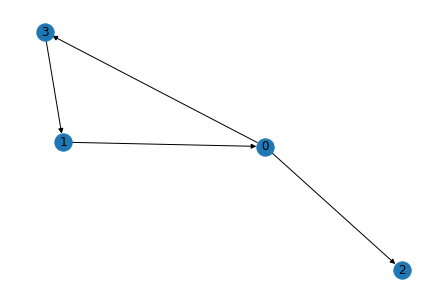

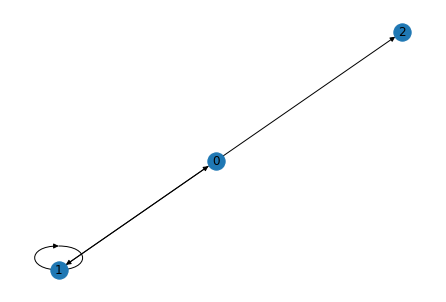

In [2]:
import networkx as nx
from Genetc import duplication as dup
from Genetc import ancestral as anc
import matplotlib.pyplot as plt
G=nx.erdos_renyi_graph(4,0.4,directed=True)
nx.draw(G,with_labels=True)
G=anc.node_merger(G,1,3)
plt.figure()
nx.draw(G,with_labels=True)

In [4]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
from Genetc import ancestral as anc
A=[1,2,3,4,5,6,7,8,9,10]
B=[10,9,8,7,5,6,4,3,2,1]
print(anc.spearmans_footrule(A,B))

0.040000000000000036


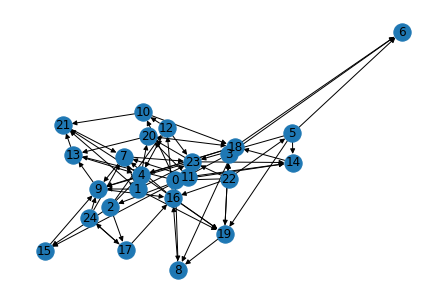

In [5]:
import networkx as nx
G_q=nx.erdos_renyi_graph(25,0.1,directed=True)
while not nx.is_connected(G_q):
    G_q=nx.erdos_renyi_graph(25,0.1,directed=True)
G_q.add_edges_from([(0,0),(1,1),(2,2)])
nx.draw(G_q,with_labels=True)

In [36]:
import netrd as nrd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random as random
from Genetc import duplication as dp
outList=[]
G=nx.DiGraph()
G.add_edge(0,0)
#G=dp.GRN_seed_graph()
steps=len(G_coli.nodes)-len(G.nodes)
print(steps)
G1=G_coli
for i in range(100):
    print(i)
    #G1=dp.ped_pea_single_lineage(G,20,r=0,q=0.4,iteration=0,isolated_nodes_allowed=False)
    
    G2=dp.ped_pea_single_lineage(G,steps,r=0,q=0.4,iteration=0,isolated_nodes_allowed=True)
    outList.append(nrd.distance.portrait_divergence.portrait_divergence(G1,G2))

plt.figure()
nx.draw(G1,with_labels=True)
plt.figure()
nx.draw(G2,with_labels=True)
plt.figure()
bins = np.arange(0, 1, 0.01) # fixed bin size

#plt.xlim([0, 200])



hist, bins = np.histogram(outList, bins=bins)

plt.hist(outList, bins=bins, alpha=0.5)
plt.title('')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()

1817
0
1


KeyboardInterrupt: 

In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from Genetc import utilities as ut
from Genetc import duplication as dup
from Genetc import alignment as al
import pickle
with open('E_coli_GRN/G_dict_rq.pkl', 'rb') as f:
    coliDict=pickle.load(f)
#print(graphDict)

In [36]:
print(nx.diameter(G))

NetworkXError: Found infinite path length because the digraph is not strongly connected

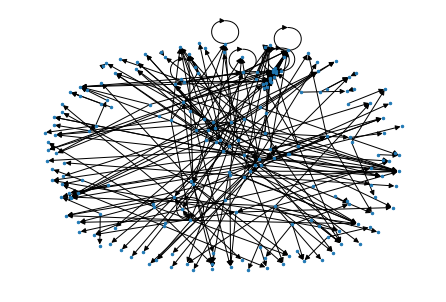

In [32]:
G=nx.DiGraph()
G.add_edge(0,0)

G2=dp.ped_pea_single_lineage(G,200,r=0,q=0.7,iteration=0,isolated_nodes_allowed=False)

nx.draw(G2,node_size=6)